# VSWR and circles on the Smith chart

This notebook explains how the Voltage Standing Wave Ratio (VSWR) relates to the Smith chart and how to plot VSWR circles with `pysmithchart`.

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

import pysmithchart
from pysmithchart.constants import IMPEDANCE_DOMAIN, ABSOLUTE_DOMAIN, REFLECTANCE_DOMAIN
from pysmithchart import utils

text_box = dict(facecolor="lightyellow")

## VSWR and $|\Gamma|$

VSWR is defined from the standing-wave ratio on a transmission line:

$$
\mathrm{VSWR} = \frac{V_{\max}}{V_{\min}}
$$

For a single reflection coefficient magnitude $|\Gamma|$ (lossless line), the relationship is:

$$
\mathrm{VSWR} = \frac{1+|\Gamma|}{1-|\Gamma|}
\qquad \Longleftrightarrow \qquad
|\Gamma| = \frac{\mathrm{VSWR}-1}{\mathrm{VSWR}+1}
$$

In [2]:
vswr = np.array([1.0, 1.5, 2.0, 3.0, 5.0, 10.0])
rho = utils.vswr_to_gamma_mag(vswr)  # rho = |Gamma|

print("   Γ        VSWR")
for v, r in zip(vswr, rho):
    print("%5.1f" % v, utils.cs(r, 2))

   Γ        VSWR
  1.0 ( 0.00 + 0.00j)
  1.5 ( 0.20 + 0.00j)
  2.0 ( 0.33 + 0.00j)
  3.0 ( 0.50 + 0.00j)
  5.0 ( 0.67 + 0.00j)
 10.0 ( 0.82 + 0.00j)


## Why VSWR circles are circles

In the $\Gamma$-plane, points with constant $|\Gamma|$ form a circle centered at the origin.

The Smith chart is a mapping between normalized impedance $z$ and $\Gamma$:

$$
\Gamma = \frac{z-1}{z+1}
$$

When you draw a constant-$|\Gamma|$ circle in the $\Gamma$-plane and map it onto the Smith chart, you get the familiar **VSWR circle**.

On a Smith chart, the center corresponds to $\Gamma = 0$ (matched load), so VSWR circles are centered on this center point.

## Reading VSWR on the horizontal axis

A VSWR circle intersects the **real axis** at two points (for lossless case). In the impedance view, those intersections correspond to the two real normalized impedances:

$$
r_{\max} = \mathrm{VSWR}, \qquad r_{\min} = \frac{1}{\mathrm{VSWR}}
$$

So, when you look at the right intersection of a VSWR circle on the horizontal axis, the value of $r$ there equals the VSWR.

This is one reason it can *look like* “the circle tells you VSWR directly” on the axis: it does.

In [3]:
vswr = 3.0
r_max = vswr
r_min = 1 / vswr
r_max, r_min

(3.0, 0.3333333333333333)

## VSWR circles with `pysmithchart`

`pysmithchart` provides `ax.plot_vswr(v)` to draw a VSWR circle.

Below we plot a few circles and label them.

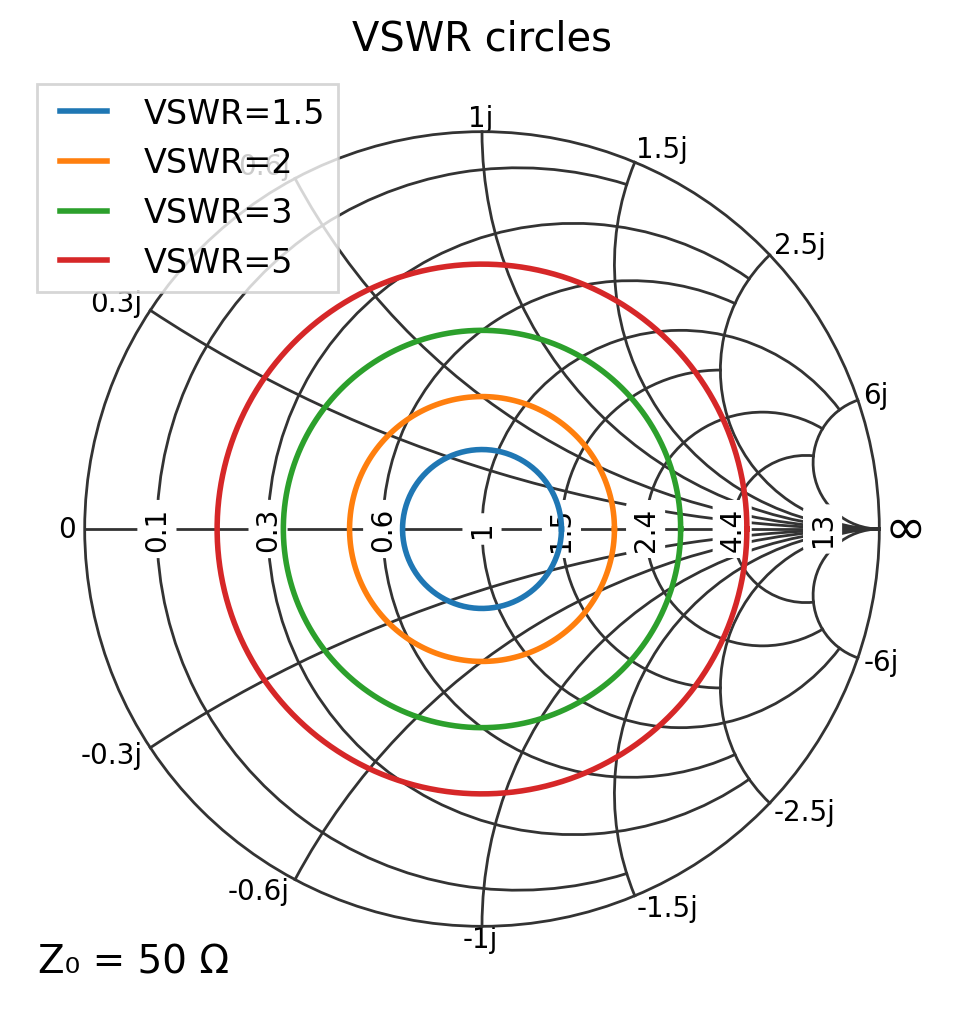

In [4]:
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

for v in [1.5, 2, 3, 5]:
    ax.plot_vswr(v, ms=0, lw=2, label=f"VSWR={v:g}")

ax.legend(loc="upper left")
ax.set_title("VSWR circles")
plt.show()

## The same circles shown in Γ coordinates

Because VSWR is fundamentally about Γ, it is useful to see the same circles in the reflection-coefficient domain.

In `REFLECTANCE_DOMAIN`, the Smith chart data coordinates are Γ.
So a VSWR circle is simply a circle of radius $\rho = |\Gamma|$.

Below we draw the circle "manually" in Γ-space and confirm it matches the VSWR=3 circle made by `plot_vswr` above.

0.5


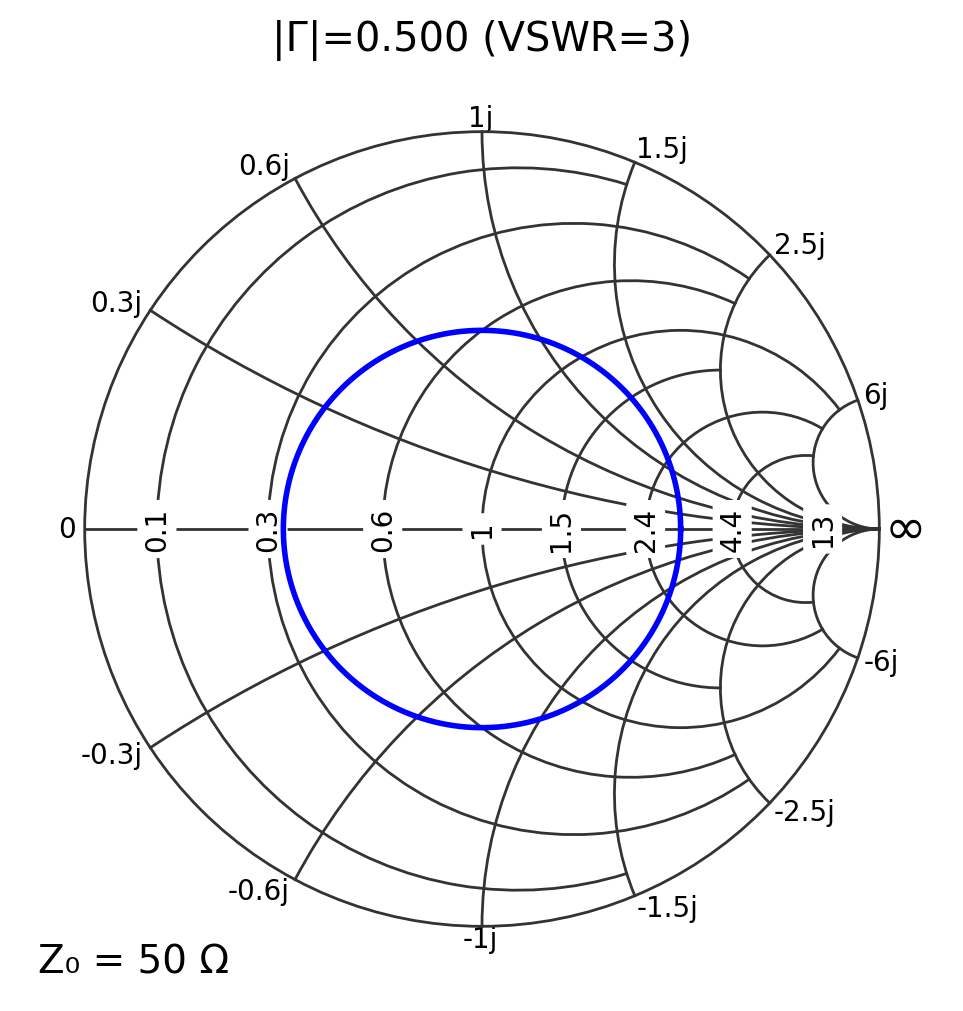

In [5]:
v = 3.0
rho = utils.vswr_to_gamma_mag(v)
print(rho)

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", domain=REFLECTANCE_DOMAIN)

theta = np.linspace(0, 2 * np.pi, 400)
Gamma_circle = rho * np.exp(1j * theta)

ax.plot(Gamma_circle, "b")
ax.set_title(f"|Γ|={rho:.3f} (VSWR={v:g})")
plt.show()

## VSWR for a point (and common misconceptions)

Given a complex impedance, VSWR depends on how far that point is from the match in the $\Gamma$ sense.

A common misconception is:
- “VSWR circle is centered on 1 (ohms).”

More precisely:
- The circles are centered on the matched point $Z=Z_0$ which is the center of the Smith chart.
- In $\Gamma$-space, the center is $\Gamma=0$.

Below we compute VSWR for a sample impedance and show its circle.

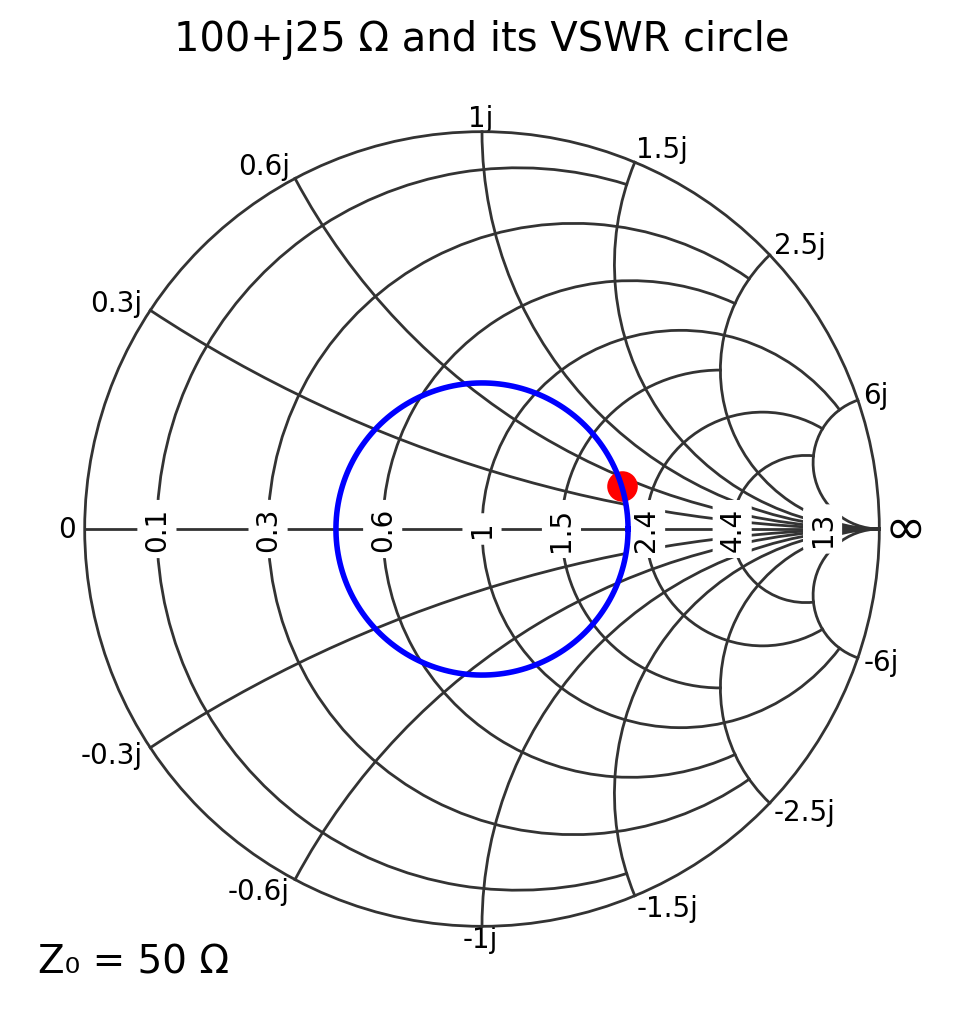

In [8]:
Z0 = 50
ZL = 100 + 1j * 25

vswr = utils.calc_vswr(Z0, ZL)

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith")

ax.plot(ZL, "ro", ms=10)
ax.plot_vswr(vswr, "b", label=f"VSWR={vswr:.2f}")

ax.set_title(f"{ZL.real:.0f}+j{ZL.imag:.0f} Ω and its VSWR circle")
plt.show()